# Tarea 3. Fuga de clientes

## Problema

Predecir el retiro temprano en una empresa de seguros que ofrece planes de pensiones privado.

**"Artículo_EarlyRetirement"**
Regresion logistica

Explicacion de los datos

**"Balanced and Unbalanced Data Sets"**
Es importante realizar un un balanceo de los datos, evaluendo los accurrancy de los modelos

## Modelo Propuesto

- Limpieza de Datos: Eliminar valores nulos, duplicados y revisar los tipos de datos.
- Balanceo de Datos: Si la variable objetivo está desbalanceada, aplicar técnicas como sobremuestreo o submuestreo.
- Entrenamiento del Modelo: Entrenar modelos de aprendizaje automático, incluyendo Random Forest, Regresión Logística y SVM.
- Evaluación del Mejor Modelo: Comparar precisión, recall, F1-score y AUC-ROC.
- Obtener los Datos de Predicción: Utilizar el mejor modelo para predecir nuevas observaciones.
  

**Campos:**

|    **Variable original**   | **Nueva Variable** |                              **Significado**                             |
|:--------------------------:|:------------------:|:------------------------------------------------------------------------:|
| Gender                     | Genero             | 1 = Hombre, 0 = Mujer                                                    |
| Disease                    | Enfermedad         | 1 = Tiene una enfermedad mortal común en México, 0 = No tiene            |
| Level of Education         | Educacion          | 1 = Primaria/Secundaria, 2 = Preparatoria, 3 = Universidad, 4 = Posgrado |
| Marital Status             | Estado_Civil       | 1 = Casado, 0 = No casado                                                |
| Salary                     | Salario            | Último salario registrado antes del retiro (en USD)                      |
| Employment Status          | Empleado           | 1 = Empleador, 0 = Empleado                                              |
| Dependants                 | Dependientes       | Número de personas que dependen económicamente del pensionado            |
| Unemployment Rate          | Tasa_desempleo     | Tasa de desempleo en el momento del retiro                               |
| Credit Score               | Credit_score       | Puntuación crediticia del individuo (400-850)                            |
| Return of Government Bonds | Gov_Bonos          | Rendimiento de los bonos gubernamentales en el momento del retiro        |
| Stock Market               | Mercado            | Valor del mercado de valores en el momento del retiro                    |
| Retire Before 65 Years Old | Early_Retirement   | 1 = Retiro antes de los 65 años, 0 = Retiro a los 65 o después           |


In [5]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [6]:
# Cargar el archivo Excel

file_path = "EarlyRetirementPrediction.xlsx"
df = pd.read_excel(file_path, sheet_name = 'BB7NV')


In [7]:
df.head()

,Retire Before 65 Years Old,Gender,Desease,Education Level,Marital Status,Monthly Income,Employee/Employer,Dependants,Unemployment Rate,Stock Market,Credit Score,Government Bonds Return,Probabilidades de Retiro Temprano
0,0,1,0,3,0,32000,0,1,5.023797,42063.16667,639,5.414833,NaN
1,0,1,1,4,0,20000,0,2,5.355220,30100.50000,610,7.962750,NaN
2,0,0,1,4,1,35000,1,1,3.843570,24066.16667,649,7.715833,NaN
3,0,0,1,3,0,27000,0,1,4.949226,19439.00000,638,8.024167,NaN
4,0,1,1,5,1,16000,0,2,5.776830,27335.50000,758,8.079917,NaN


In [8]:
# Renombrar columnas para mayor claridad

df.rename(columns={
    'Retire Before 65 Years Old': 'Early_Retirement',
    'Gender': 'Genero',
    'Desease': 'Enfermedad',
    'Education Level': 'Educacion',
    'Marital Status': 'Estado_Civil',
    'Monthly Income': 'Salario',
    'Employee/Employer': 'Empleado',
    'Dependants': 'Dependientes',
    'Unemployment Rate': 'Tasa_desempleo',
    'Stock Market': 'Mercado',
    'Credit Score': 'Credit_score',
    'Government Bonds Return': 'Gov_Bonos'
}, inplace=True)


In [9]:
df.head()

,Early_Retirement,Genero,Enfermedad,Educacion,Estado_Civil,Salario,Empleado,Dependientes,Tasa_desempleo,Mercado,Credit_score,Gov_Bonos,Probabilidades de Retiro Temprano
0,0,1,0,3,0,32000,0,1,5.023797,42063.16667,639,5.414833,NaN
1,0,1,1,4,0,20000,0,2,5.355220,30100.50000,610,7.962750,NaN
2,0,0,1,4,1,35000,1,1,3.843570,24066.16667,649,7.715833,NaN
3,0,0,1,3,0,27000,0,1,4.949226,19439.00000,638,8.024167,NaN
4,0,1,1,5,1,16000,0,2,5.776830,27335.50000,758,8.079917,NaN


In [10]:
# Verificar valores nulos

print("Valores nulos en el dataset:\n \n", df.isnull().sum())


Valores nulos en el dataset:
 
 Early_Retirement                        0
Genero                                  0
Enfermedad                              0
Educacion                               0
Estado_Civil                            0
Salario                                 0
Empleado                                0
Dependientes                            0
Tasa_desempleo                          0
Mercado                                 0
Credit_score                            0
Gov_Bonos                               0
Probabilidades de Retiro Temprano    1500
dtype: int64


In [11]:
# Eliminar columna de probabilidades 

df.drop(columns=['Probabilidades de Retiro Temprano'], inplace = True)


In [12]:
print("Valores nulos en el dataset:\n \n", df.isnull().sum())

Valores nulos en el dataset:
 
 Early_Retirement    0
Genero              0
Enfermedad          0
Educacion           0
Estado_Civil        0
Salario             0
Empleado            0
Dependientes        0
Tasa_desempleo      0
Mercado             0
Credit_score        0
Gov_Bonos           0
dtype: int64


/var/folders/ct/cf8v_6td4sjd6_m0d5bnd1mc0000gn/T/ipykernel_20987/4232240311.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Early_Retirement'], palette = "viridis")


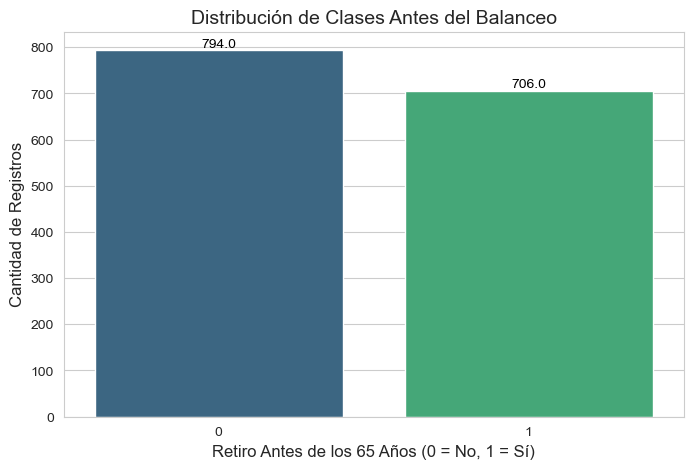

In [13]:
# Configuración del estilo del gráfico
plt.figure(figsize = (8,5))
sns.set_style("whitegrid")

# Crear el gráfico de barras
sns.countplot(x = df['Early_Retirement'], palette = "viridis")

# Títulos y etiquetas
plt.title("Distribución de Clases Antes del Balanceo", fontsize = 14)
plt.xlabel("Retiro Antes de los 65 Años (0 = No, 1 = Sí)", fontsize = 12)
plt.ylabel("Cantidad de Registros", fontsize = 12)

# Mostrar la cantidad de registros en cada barra
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), f'{p.get_height()}', 
             ha = 'center', va = 'bottom', fontsize = 10, color = 'black')

# Mostrar el gráfico
plt.show()

In [14]:
df.describe()

,Early_Retirement,Genero,Enfermedad,Educacion,Estado_Civil,Salario,Empleado,Dependientes,Tasa_desempleo,Mercado,Credit_score,Gov_Bonos
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.470667,0.606000,0.426667,3.949333,0.576000,25049.200000,0.401333,2.498000,4.535757,32424.434445,699.158667,7.141414
std,0.499305,0.488798,0.494758,0.859026,0.494355,7815.040367,0.490332,1.131452,0.763738,9521.113675,58.324220,1.236645
min,0.000000,0.000000,0.000000,1.000000,0.000000,15000.000000,0.000000,1.000000,2.939656,12789.000000,600.000000,5.095083
25%,0.000000,0.000000,0.000000,3.000000,0.000000,18000.000000,0.000000,1.000000,3.843570,26982.333330,646.000000,6.057500
50%,0.000000,1.000000,0.000000,4.000000,1.000000,23000.000000,0.000000,2.000000,4.721421,32304.666670,700.000000,7.193917
75%,1.000000,1.000000,1.000000,5.000000,1.000000,32000.000000,1.000000,4.000000,5.111358,41229.833330,751.000000,8.024167
max,1.000000,1.000000,1.000000,5.000000,1.000000,40000.000000,1.000000,4.000000,6.741151,44555.833330,800.000000,10.074167


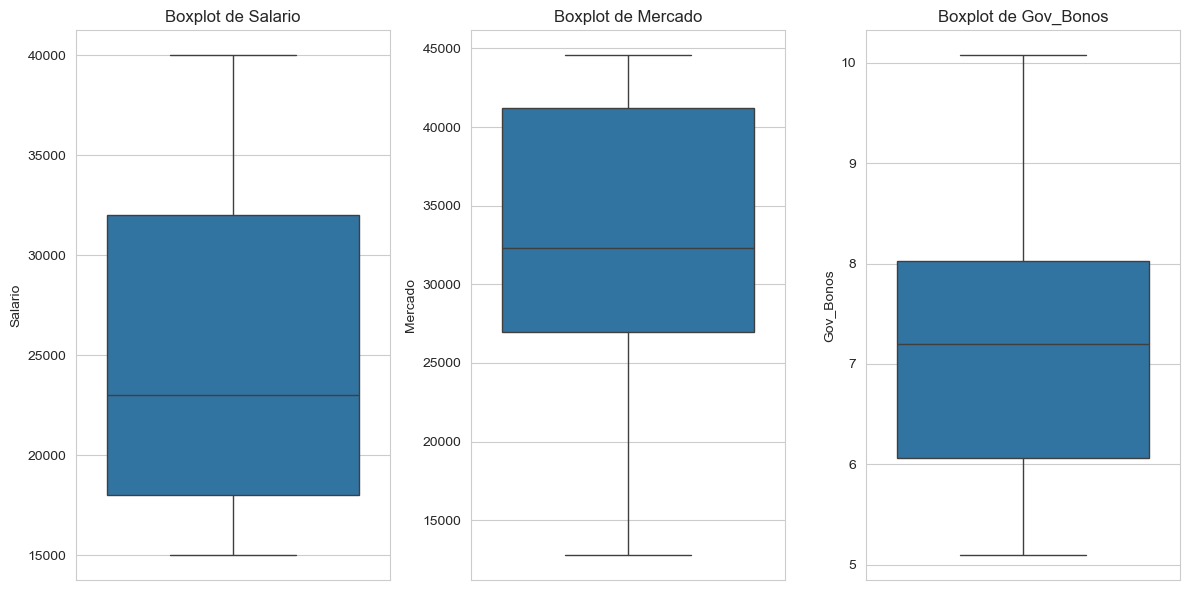

In [15]:
# Visualizar outliers con boxplots para variables numéricas relevantes

num_vars = ["Salario", "Mercado", "Gov_Bonos"]
plt.figure(figsize = (12, 6))

for i, col in enumerate(num_vars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y = df[col])
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

## Análisis de diferentes modelos

In [17]:
# Separar variables predictoras y objetivo

X = df.drop(columns=['Early_Retirement'])
y = df['Early_Retirement']


In [18]:
# Balancear los datos con SMOTE 

smote = SMOTE(sampling_strategy = 'auto', random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [19]:
# Dividir en conjunto de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size = 0.3, random_state = 42, stratify = y_resampled)


In [20]:
# Normalizar los datos

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
# Entrenar modelos

models = {
    "Random Forest": RandomForestClassifier(n_estimators = 100, random_state = 42),
    "Regresión Logística": LogisticRegression(max_iter = 1000, random_state = 42),
    "SVM": SVC(kernel = 'linear', probability = True, random_state = 42)
}


In [22]:
# Evaluar modelos y guardar métricas

model_scores = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    
    # Guardar métricas en un diccionario
    model_scores[name] = {
        "AUC-ROC": auc,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict = True)
    }
    
    print(f"\nModelo: {name}")
    print(f"AUC-ROC: {auc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    


Modelo: Random Forest
AUC-ROC: 0.8408
[[188  51]
 [ 44 194]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       239
           1       0.79      0.82      0.80       238

    accuracy                           0.80       477
   macro avg       0.80      0.80      0.80       477
weighted avg       0.80      0.80      0.80       477


Modelo: Regresión Logística
AUC-ROC: 0.8437
[[191  48]
 [ 44 194]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       239
           1       0.80      0.82      0.81       238

    accuracy                           0.81       477
   macro avg       0.81      0.81      0.81       477
weighted avg       0.81      0.81      0.81       477


Modelo: SVM
AUC-ROC: 0.8434
[[190  49]
 [ 44 194]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       239
           1       0.80      0.82      0.81       238



In [23]:
# Seleccionar el mejor modelo

best_model_name = max(model_scores, key = lambda k: model_scores[k]["AUC-ROC"])
best_model = models[best_model_name]
best_auc = model_scores[best_model_name]["AUC-ROC"]

print(f"\n El mejor modelo es: **{best_model_name}** con AUC-ROC: {best_auc:.4f} \n")



 El mejor modelo es: **Regresión Logística** con AUC-ROC: 0.8437 



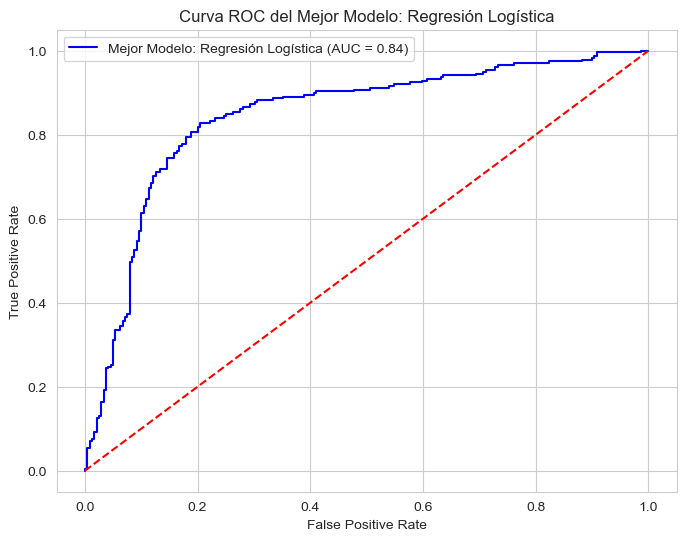

In [24]:
# Graficar la curva ROC del mejor modelo

y_prob_best = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_best)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Mejor Modelo: {best_model_name} (AUC = {best_auc:.2f})', color = 'blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Curva ROC del Mejor Modelo: {best_model_name}')
plt.legend()
plt.show()


In [25]:
# Agregar la columna con la probabilidad de retiro temprano usando el mejor modelo

df['Probabilidad_Retiro_Temprano'] = best_model.predict_proba(scaler.transform(X))[:, 1]


In [26]:
# Obtener predicciones del mejor modelo

df['Predicted_Early_Retirement'] = best_model.predict(scaler.transform(X))


In [27]:
df.head()

,Early_Retirement,Genero,Enfermedad,Educacion,Estado_Civil,Salario,Empleado,Dependientes,Tasa_desempleo,Mercado,Credit_score,Gov_Bonos,Probabilidad_Retiro_Temprano,Predicted_Early_Retirement
0,0,1,0,3,0,32000,0,1,5.023797,42063.16667,639,5.414833,0.079728,0
1,0,1,1,4,0,20000,0,2,5.355220,30100.50000,610,7.962750,0.307010,0
2,0,0,1,4,1,35000,1,1,3.843570,24066.16667,649,7.715833,0.040612,0
3,0,0,1,3,0,27000,0,1,4.949226,19439.00000,638,8.024167,0.032932,0
4,0,1,1,5,1,16000,0,2,5.776830,27335.50000,758,8.079917,0.282623,0


In [28]:
# Guardar los resultados en un nuevo archivo Excel

df.to_excel("EarlyRetirementPrediction_Results.xlsx", index = False)
print("Predicciones guardadas en 'EarlyRetirementPrediction_Results.xlsx'")


Predicciones guardadas en 'EarlyRetirementPrediction_Results.xlsx'


In [29]:
# Guardar el archivo en formato CSV con separador "|"

output_csv_file = "EarlyRetirementPrediction_Results.csv"
df.to_csv(output_csv_file, sep = "|", index = False, encoding = "utf-8")
print(f"Archivo generado con éxito: {output_csv_file}")


Archivo generado con éxito: EarlyRetirementPrediction_Results.csv


## 20 clientes con mayor probabilidad de retiro temprano

In [68]:
# Ordenar los clientes por la probabilidad de retiro temprano en orden descendente

top_clients = df.sort_values(by = "Probabilidad_Retiro_Temprano", ascending = False).head(20)


In [70]:
# Mostrar los 20 clientes con mayor probabilidad de retiro temprano

top_clients


,Early_Retirement,Genero,Enfermedad,Educacion,Estado_Civil,Salario,Empleado,Dependientes,Tasa_desempleo,Mercado,Credit_score,Gov_Bonos,Probabilidad_Retiro_Temprano,Predicted_Early_Retirement
1212,Retiro Antes de 65,Masculino,Tiene Enfermedad,Primaria/Secundaria,Soltero,15000,Empleador,4,2.939656,19520.66667,693,8.896667,0.982663,1
1354,Retiro Antes de 65,Masculino,Sin Enfermedad,Universidad,Soltero,16000,Empleador,4,4.200000,43587.50000,620,6.165000,0.979894,1
709,Retiro Después de 65,Masculino,Sin Enfermedad,Posgrado,Soltero,15000,Empleador,4,3.468684,14487.16667,734,8.983333,0.978515,1
1014,Retiro Antes de 65,Masculino,Sin Enfermedad,Universidad,Casado,16000,Empleador,4,4.929185,41229.83333,678,5.910000,0.976216,1
1430,Retiro Antes de 65,Masculino,Sin Enfermedad,Universidad,Soltero,18000,Empleador,4,5.353961,31577.33333,699,7.701083,0.975822,1
966,Retiro Antes de 65,Masculino,Sin Enfermedad,Universidad,Soltero,16000,Empleador,4,5.362207,35583.16667,786,6.431667,0.972003,1
883,Retiro Antes de 65,Masculino,Sin Enfermedad,Posgrado,Casado,26000,Empleador,4,2.939656,19520.66667,624,8.896667,0.971573,1
1095,Retiro Antes de 65,Masculino,Sin Enfermedad,Posgrado,Casado,27000,Empleador,4,3.227429,30804.00000,690,8.431667,0.971361,1
725,Retiro Después de 65,Masculino,Sin Enfermedad,Primaria/Secundaria,Casado,18000,Empleado,4,5.344491,22755.00000,601,7.940833,0.970881,1
1299,Retiro Antes de 65,Masculino,Sin Enfermedad,Universidad,Casado,28000,Empleador,4,3.520612,30573.16667,660,7.733417,0.970846,1


In [72]:
# Guardar los datos en un nuevo archivo CSV

output_top_clients_csv = "Top_20_Clientes_Probabilidad_Retiro.csv"
top_clients.to_csv(output_top_clients_csv, sep = "|", index = False, encoding = "utf-8")

print(f"✅ Archivo generado con éxito: {output_top_clients_csv}")


✅ Archivo generado con éxito: Top_20_Clientes_Probabilidad_Retiro.csv


## Crear archivo para mayor facilidad en power bi

In [31]:
# Decodificar valores numéricos a etiquetas comprensibles para Power BI
genero_map = {0: "Femenino", 1: "Masculino"}
enfermedad_map = {0: "Sin Enfermedad", 1: "Tiene Enfermedad"}
educacion_map = {1: "Primaria/Secundaria", 2: "Preparatoria", 3: "Universidad", 4: "Posgrado", 5: "Doctorado"}
estado_civil_map = {0: "Soltero", 1: "Casado"}
empleado_map = {0: "Empleado", 1: "Empleador"}
early_retirement_map = {0: "Retiro Después de 65", 1: "Retiro Antes de 65"}

# Aplicar mapeo a las columnas categóricas
df["Genero"] = df["Genero"].map(genero_map)
df["Enfermedad"] = df["Enfermedad"].map(enfermedad_map)
df["Educacion"] = df["Educacion"].map(educacion_map)
df["Estado_Civil"] = df["Estado_Civil"].map(estado_civil_map)
df["Empleado"] = df["Empleado"].map(empleado_map)
df["Early_Retirement"] = df["Early_Retirement"].map(early_retirement_map)


In [32]:
# Guardar el archivo actualizado con los nuevos nombres de columnas
decoded_file_path = "EarlyRetirementPrediction_Decoded.xlsx"
df.to_excel(decoded_file_path, index = False)

print(f"Archivo generado con éxito: {decoded_file_path}")

Archivo generado con éxito: EarlyRetirementPrediction_Decoded.xlsx


In [33]:
# Guardar el archivo en formato CSV con separador "|"

output_csv_file = "EarlyRetirementPrediction_Decoded.csv"
df.to_csv(output_csv_file, sep = "|", index = False, encoding = "utf-8")
print(f"Archivo generado con éxito: {output_csv_file}")


Archivo generado con éxito: EarlyRetirementPrediction_Decoded.csv
